In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00


In [ ]:
pip install fairseq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 98.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.7/272.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11170730 sha256=499ce2468e8267495e773f4f4d268d045e24abdd5886f527fbab718ef7ea2a75
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Cr

In [ ]:
import os
os.chdir("drive/My Drive/wav2vec2")

In [ ]:
!ls

sa2.wav    sx237.wav  sx57.wav		     wav2vec_small_960h.pt
si486.wav  sx327.wav  wav2vec_small_100h.pt  wav2vec_small.pt
si957.wav  sx417.wav  wav2vec_small_10m.pt


In [ ]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

2.0.0+cu118
2.0.1+cu118


In [ ]:
!python --version
!nvidia-smi
!pip install -q transformers
!pip install -q pydub
!pip install torch 

Python 3.10.11
Thu May 11 15:17:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                         

In [ ]:
import torch
import torch.nn as nn
from transformers import Wav2Vec2Model
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
from transformers import Wav2Vec2Processor

In [ ]:
import torch
from transformers import Wav2Vec2ForCTC

# Define the path to the saved checkpoint file
checkpoint_path_t = "wav2vec_small_960h.pt"
checkpoint_path_p = "wav2vec_small.pt"
# Load the model's state dictionary from the checkpoint file
state_dict_t = torch.load(checkpoint_path_t, map_location=torch.device('cuda'))
state_dict_p = torch.load(checkpoint_path_p, map_location=torch.device('cuda'))

# Create a new Wav2Vec2ForCTC model and load the state dictionary
model_t = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h", state_dict=state_dict_t)
model_p = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base", state_dict=state_dict_p)


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['args', 'extra_state', 'optimizer_history', 'last_optimizer_state', 'model']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['encoder.layers.9.attention.v_proj.bias', 'feature_extractor.conv_layers.2.conv.weight', 'encoder.layers.11.attention.v_proj.bias', 'encoder.layers.9.feed_forward.intermediate_dense.weight', 'encoder.layers

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForCTC: ['args', 'extra_state', 'optimizer_history', 'last_optimizer_state', 'model']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['encoder.layers.9.attention.v_proj.bias', 'feature_extractor.conv_layers.2.conv.weight', 'encoder.layers.11.attention.v_proj.bias', 'encoder.layers.9.feed_forward.intermediate_dense.weight', 'encoder.layers.6.feed_fo

In [ ]:
model_t.eval()

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [ ]:
model_p.eval()

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [ ]:
conv_layers_t = [layer for layer in model_t.modules() if isinstance(layer, torch.nn.Conv1d)]

In [ ]:
conv_layers_p = [layer for layer in model_p.modules() if isinstance(layer, torch.nn.Conv1d)]

In [ ]:
processor_t = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
tokenizer_t = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:757: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


In [ ]:
processor_p = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
tokenizer_p = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


In [ ]:
import numpy as np

audio_file_1, sample_rate = torchaudio.load("sx57.wav")
audio_file_2, sample_rate = torchaudio.load("sx327.wav")
target_sample_rate = 16000

# Resample waveform to the target sample rate
resample_transform = torchaudio.transforms.Resample(sample_rate, target_sample_rate)
audio_file_1 = resample_transform(audio_file_1)

resample_transform = torchaudio.transforms.Resample(sample_rate, target_sample_rate)
audio_file_2 = resample_transform(audio_file_2)

input_values_t = tokenizer_t(audio_file_1, sampling_rate=16000, return_tensors="pt").input_values
input_values_p = tokenizer_p(audio_file_1, sampling_rate=16000, return_tensors="pt").input_values
# input_values_t = processor_t(audio_file_1, sampling_rate=16000, return_tensors="pt").input_values
# input_values_p = processor_p(audio_file_1, sampling_rate=16000, return_tensors="pt").input_values
#print(input_values.shape)

original_input_t= input_values_t
original_input_p = input_values_p
conv_layer_outputs_t =[] #store convolutional layer  output for finetuned model
conv_layer_outputs_p =[] #store convolutional layer  output for pretranied model

print("---Fine Tuned ---")
for i, conv_layer in enumerate(conv_layers_t):

    print(f"layer {i}")
    if i !=7: 
      outputs_t = conv_layer(input_values_t) # conv layer output for finetuned model
      conv_layer_outputs_t.append(outputs_t)
    print(outputs_t.shape)
    input_values_t = outputs_t
  
print("---Pretrained ---")
for i, conv_layer in enumerate(conv_layers_p):

    print(f"layer {i}")
    if i !=7: 
      outputs_p = conv_layer(input_values_p) # conv layer output for pretrained  model
      conv_layer_outputs_p.append(outputs_p)
    print(outputs_p.shape)
    input_values_p = outputs_p


---Fine Tuned ---
layer 0
torch.Size([1, 512, 8170])
layer 1
torch.Size([1, 512, 4084])
layer 2
torch.Size([1, 512, 2041])
layer 3
torch.Size([1, 512, 1020])
layer 4
torch.Size([1, 512, 509])
layer 5
torch.Size([1, 512, 254])
layer 6
torch.Size([1, 512, 127])
layer 7
torch.Size([1, 512, 127])
---Pretrained ---
layer 0
torch.Size([1, 512, 8170])
layer 1
torch.Size([1, 512, 4084])
layer 2
torch.Size([1, 512, 2041])
layer 3
torch.Size([1, 512, 1020])
layer 4
torch.Size([1, 512, 509])
layer 5
torch.Size([1, 512, 254])
layer 6
torch.Size([1, 512, 127])
layer 7
torch.Size([1, 512, 127])


In [ ]:
print(len(conv_layer_outputs_p))
print(len(conv_layer_outputs_t))

7
7


In [ ]:
mean_dist_arr=[]

In [ ]:
#store length of conv layer output
length = len(conv_layer_outputs_t)

In [ ]:
import numpy as np
mfcc_dist_mat = np.ones((6,13))
print(mfcc_dist_mat)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
def store_mfcc_feature(dist_matric,k):
  temp = []
  m,n= dist_matric[0].shape
  mat  = dist_matric[0].detach().numpy()
  for i in range(m):
    mfcc_dist_mat[k][i] = mat[i][i]
  
  # new_row = np.array(temp)
  # print(temp)
  # mfcc_dist_mat = np.vstack([mfcc_dist_mat, temp])


For 39 mfcc features

In [ ]:
def store_mfcc_feature_39(dist_matric,k):
  temp = []
  m,n= dist_matric[0].shape
  mat  = dist_matric[0].detach().numpy()
  for i in range(m):
    mfcc_dist_mat_39[k][i] = mat[i][i]
  
  # new_row = np.array(temp)
  # print(temp)
  # mfcc_dist_mat = np.vstack([mfcc_dist_mat, temp])

In [ ]:
for i in range(length):
    output_t = conv_layer_outputs_t[i]
    output_p = conv_layer_outputs_p[i]

    
#     mfcc_1 = librosa.feature.mfcc(y=output_1[0].detach().numpy(), sr=target_sample_rate, n_mfcc=13)
#     mfcc_2 = librosa.feature.mfcc(y=output_2[0].detach().numpy(), sr=target_sample_rate, n_mfcc=13)
#     print(output_1.shape)
#     print(output_2.shape)
#     Extract MFCC features
    mfcc_transform = torchaudio.transforms.MFCC(sample_rate=target_sample_rate, n_mfcc=13)
    mfcc_t = mfcc_transform(output_t[0])
    mfcc_p = mfcc_transform(output_p[0])
#     print(mfcc_1.shape)
#     print(mfcc_2.shape)

# Pad the smaller tensor with zeros to match the shape of the larger tensor
    if mfcc_t.shape[2] > mfcc_p.shape[2]:
        mfcc_p = torch.nn.functional.pad(mfcc_p, (0, mfcc_t.shape[2] - mfcc_p.shape[2]), "constant", 0)
    else:
        mfcc_t = torch.nn.functional.pad(mfcc_t, (0, mfcc_p.shape[2] - mfcc_t.shape[2]), "constant", 0)

#     print(mfcc_1.shape)
#     print(mfcc_2.shape)
    print(f"MFCC Distance metric for conv layer output-{i}")
    # print(mfcc_t[0])
    # print(mfcc_p[0])

#Calculate pairwise distance between MFCC frames
    distance = torch.cdist(mfcc_t, mfcc_p)
# Calculate mean distance across frames
# print(mfcc_1)
# print(mfcc_2)
    min_distance = torch.min(distance)
    max_distance = torch.max(distance)
# print(min_distance,max_distance)
   
    distance = (distance - min_distance) / (max_distance - min_distance)#moramalized distance
    mean_distance = distance.mean()
    mean_dist_arr.append(mean_distance)
    store_mfcc_feature(distance,i)
#     print(distance.shape)

#     print(distance.shape)
# print(distance[0].detach().numpy())
# print("MFCC distance between the two tensors:", mean_distance.item())
    plt.figure(figsize=(16, 8))
# Create a heatmap of the distance matrix using seaborn
    sns.heatmap(distance[0].detach().numpy(),annot=True, cmap="viridis")

# Set the axis labels and title
    # plt.xlabel("Second waveform")
    # plt.ylabel("First waveform")
    plt.xlabel("Pretrained model")
    plt.ylabel("fineTune model")
    plt.title("MFCC distance matrix")

# Show the plot
    plt.show()

In [ ]:
print(mfcc_dist_mat)

[[0.10438281 0.09166931 0.04592898 0.02286891 0.01739038 0.01610173
  0.01487199 0.01269663 0.01116639 0.01157059 0.00988193 0.01265599
  0.00886657]
 [0.08251526 0.0706334  0.03305003 0.01399954 0.01473619 0.00968673
  0.02058787 0.01862562 0.02183239 0.01668872 0.01052993 0.00745267
  0.01128723]
 [0.20806773 0.09180806 0.04648111 0.02047485 0.05459319 0.01501791
  0.02713205 0.02216307 0.02196765 0.0327205  0.01743147 0.0204423
  0.01946701]
 [0.02670904 0.04812713 0.05276109 0.03667854 0.02370487 0.03604935
  0.02242748 0.02438927 0.02683895 0.01562839 0.01562026 0.01773801
  0.01684963]
 [0.02924649 0.03288728 0.03359386 0.04773618 0.02979234 0.03871544
  0.01076784 0.0137431  0.00890956 0.04065562 0.02026968 0.0102484
  0.03182034]
 [0.0545456  0.0500185  0.04348718 0.0472356  0.02338614 0.00595419
  0.03236148 0.00742922 0.02302449 0.01431297 0.02968946 0.01120612
  0.00635144]]


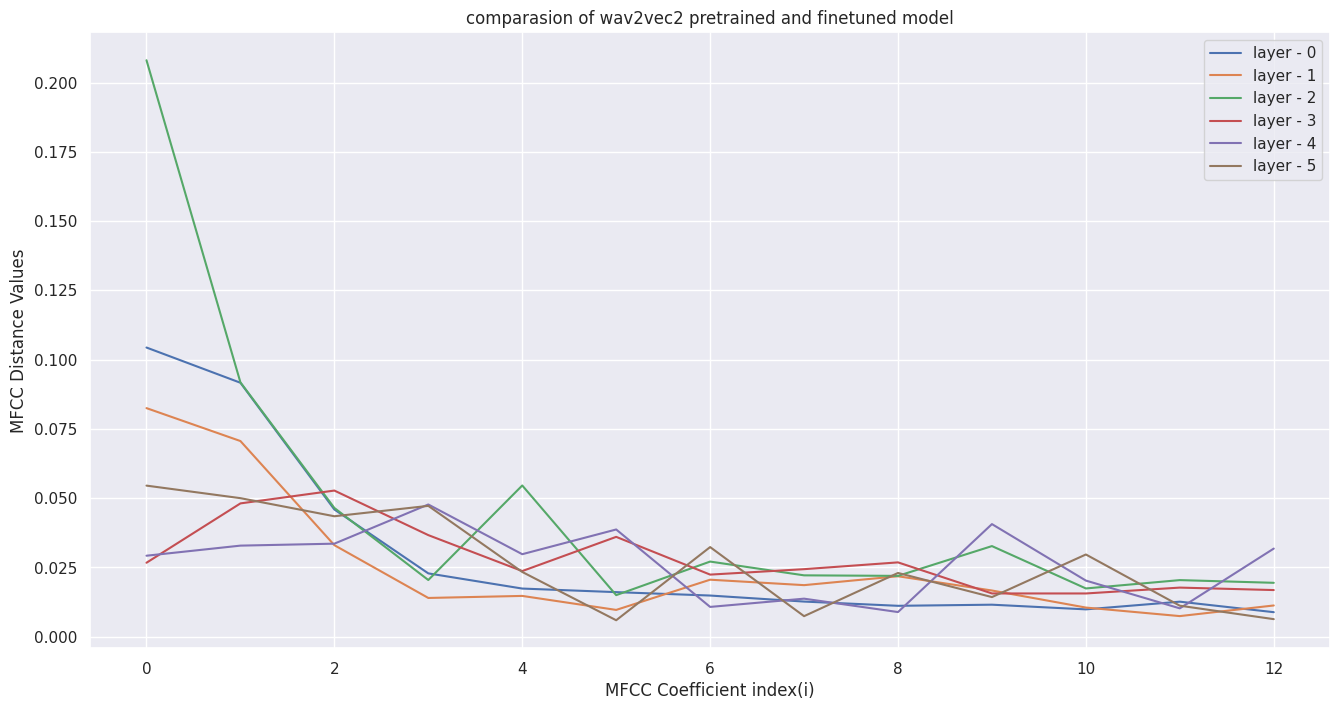

In [ ]:
plt.figure(figsize=(16, 8))

# labels = ['a', 'b', 'c', 'd', 'e','f']
# labels = np.array(labels)
# plt.plot(mfcc_dist_mat.T)
F = []
for i in range(13):
  F.append(i)
for i in range(6):
  plt.plot(F,mfcc_dist_mat[i],label = f"layer - {i}")
plt.title("comparasion of wav2vec2 pretrained and finetuned model")
plt.ylabel("MFCC Distance Values")
plt.xlabel("MFCC Coefficient index(i)")
plt.legend()
plt.show()